***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [2. Mathematical Groundwork](2_0_introduction.ipynb)
    * Previous: [2.8 The Discrete Fourier Transform (DFT) and the Fast Fourier Transform (FFT)](2_8_the_discrete_fourier_transform.ipynb)
    * Next: [2.10 Linear Algrebra](2_10_linear_algebra.ipynb)

***

Import standard modules:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [4]:
from IPython.display import HTML, display
from ipywidgets import interact
HTML('../style/code_toggle.html')

## 2.9 采样理论 Sampling Theory<a id='math:sec:sampling_theory'></a>

射电干涉测量的目标是通过对空间频率域（谱的形式，后面的课程会看到）的有限采样来生成天图。通过有限的离散采样，我们把连续问题变成了离散问题。回想上一节里的最后部分，我们所看到的离散傅立叶变换（DFT）所输出的一些奇奇怪怪的东西，尤其需要注意的有以下几点：

Our goal in radio interferometry is to produce a map of the sky by sampling a finite number of spatial frequency modes present in its spectrum (this will become clearer as the course unfolds). By sampling only a discrete number of frequency modes we are effectively turning a continuous problem into a discrete one. Recall that at the end of the last section we saw some peculiarities in the output of the discrete Fourier transform (DFT). In particular we note the following features:

* 呈现出的输入信号中的一些频率没有非零分量$Y_k$。
* 呈现在输入信号中的频率分量$Y_k$的幅值不总是相等，尽管在实际的输入信号里是相同的。
* 当采样数$N$小于某个值时，从呈现出的输入信号中看不出周期性。

* That there were non-zero components $Y_k$ at frequencies which were not present in the input signal.
* That the amplitudes of the $Y_k$ corresponding to the frequencies present in the input signal were not all equal dispite the fact that they are the same in the input signal.
* That is was not possible to find the frequencies present in the input signal when $N$ (the number of samples) was below a certain number. 

上述情况将以各种形式表现在射电干涉测量中。本节的目的在于以直观的方式，解释离散谱里为什么会出现上述情况，这就需要对混叠和奈奎斯特-香浓采样理论（简称采样理论）进行讨论，从而回答以下问题：

These features will, in some form or another, also be present in radio interferometry. The aim of this section is to develop an intuitive understanding of why the above features are present in the discrete spectrum. This requires discussing aliasing and the Nyquist-Shannon sampling theorem (or just sampling theorem for short) which will allow us to answer questions such as:

* 给定一个望远镜的有效口径，算出重建图像的最大像素尺寸？
* 在重建图像中，哪些属于天空的真实特性，哪些是由有限采样所引入的人工特征？

* Given the (effective) diameter of a telescope, what is the maximum pixel size we can choose for the reconstructed image?
* Which of the features in the reconstructed image are real features corresponding to the sky and which are artificial features introduced by sampling only a limited number of frequency modes?

注意，对于干涉测量，我们是在空间频率域进行采样。然而，我们的直觉很难扩展到空间频率域，而是更愿意按事情的顺序来想问题，即时域。干涉测量也一样，比起频率域，我们很容易把直觉扩展到图像域。在本节，为简单起见，我们将用时间序列来感受傅立叶空间的事情，即频率域。

Note that, in interferometry, we are sampling in the spatial frequency domain. Unfortunately, our intuition does not extend as easily to this domain. We are more inclined to think of the world in terms of a sequence of events i.e. in the time domain. A similar statement is true in interferometry. Our intuition extends more easily to the image domain than to its spectral dual. In this section, for simplicity, we will use time series to get a feeling for what is going on in the dual Fourier space viz. the frequency domain. 



### 2.9.1 连续函数的采样 Sampling a Continuous Function <a id='math:sec:sampling_continuous_function'></a>

我们可以把采样简单理解为从一个连续函数中选择出若干个点。简单起见，我们先从一个实函数开始：

Intuitively we can think of the act of sampling simply as selecting a number of points of a continuous function. For simplicity let's start by considering a real valued function 

$$ f:\mathbb{R} \rightarrow \mathbb{R}. $$

无限个等间距采样的数学表示为：

The mathematical equivalent of selecting an infinite number of equally spaced samples can be expressed as 

$$ f(t_n) = \sum_{n = -\infty}^{\infty} f(t) \delta(t - n\Delta t) = f(t)\frac{1}{\Delta t}III(\frac{t}{\Delta t}), $$

其中，$\Delta t$是采样间隔，$n$表示采样序号，$III(\cdot)$是狄拉克梳子Dirac comb函数，也叫Shah函数。显然，我们实际上不可能做无限数量的采样。假定我们对一个函数在有限区域$t_0 \leq t \leq t_f$进行$N$次采样，可以表示为：

where $\Delta t$ is the sampling interval, the index $n$ labels the samples and $III(\cdot)$ is the Dirac comb (Shah function). Obviously it is not possible to sample a function at an infinite number of points in practice. Suppose we sample a function at $N$ points in a finite domain, $t_0 \leq t \leq t_f$ say. This can be achieved as follows

$$ f(t_n) = \sum_{n = 0}^{N-1} f(t) \delta(t - n\Delta t - t_0), \quad \mbox{where} \quad \Delta t = \frac{t_f - t_0}{N-1}, \quad \mbox{and} \quad t_n = t_0 + n\Delta t. $$

到目前为止，我们还只是用连续函数，对采样进行了一个数学表达。接下来，我们将用在([$\S$ 2.2](2_2_important_functions.ipynb))所引入的特殊函数来描述采样：

So far we have done nothing fancy, we have just expressed the act of sampling in terms of a continuous mathematical function. We can go a step further and write it purely in terms of the special functions introduced in ([$\S$ 2.2](2_2_important_functions.ipynb)) as

$$f(t_n)= f(t)\frac{1}{\Delta t}III(\frac{t}{\Delta t})\sqcap_{t_0,t_f}(t), $$

其中，$\sqcap_{a,b}(\cdot)$是窗函数。因此，采样函数可以表示为：

where $\sqcap_{a,b}(\cdot)$ is the boxcar function. The sampling function can therefore be expressed as

$$ s_{t_0,\Delta t, N} = \frac{1}{\Delta t}III(\frac{t}{\Delta t})\sqcap_{t_0,t_f}(t),   $$

其中，函数$s_{t_0,\Delta t, N} $只是$t_0 \leq t \leq t_f$区间范围内的N个采样点，$t_f = (N-1)\Delta t$。

where it should be understood that the function $s_{t_0,\Delta t, N} $ implies a sampling of $N$ points in the interval $t_0 \leq t \leq t_f$ where $t_f = (N-1)\Delta t$. 


到目前为止，你也许会小瞧这些貌似麻烦的符号，但是，这确实有用。接下来，让我们对经过采样的函数，即$f(t_n)$，做傅立叶变换。首先回忆一下1-D傅立叶变换的定义：

At this stage you might be rolling your eyes at this seemingly cumbersome notation but it does serve a purpose. Consider what happens when we take the Fourier transform of the sampled function $f(t_n)$. First, recall the definition of the 1-D Fourier transform

$$ \mathscr{F}\{f(t)\}(s) = \int_{-\infty}^{\infty} f(t)e^{-2\pi\imath t s} dt. $$

代入经过采样的函数，得到：

Substituting in the sampled function we get

$$ \mathscr{F}\{f(t_n)\}(s) = \int_{-\infty}^{\infty} f(t)\frac{1}{\Delta t}III(\frac{t}{\Delta t})\sqcap_{t_0,t_f}(t)e^{-2\pi\imath t s} dt. $$

接下来，利用狄拉克梳子，即采样函数，把连续积分变成离散和，即

Next the Dirac comb changes the continuous integral into a discrete sum i.e.

$$ \mathscr{F}\{f(t_n)\}(s) = \sum_{n = -\infty}^{\infty} f(t_n) \sqcap_{t_0,t_f}(t)e^{-2\pi\imath t_n s}. $$

卡方函数，即窗口函数，把$n \notin [0,\cdots,N-1]$，即采样窗口以外的值都置为零，得到：

The boxcar function sets at the terms for which $n \notin [0,\cdots,N-1]$ to zero. Thus we have

$$ \mathscr{F}\{f(t_n)\}(s) = \sum_{n = 0}^{N-1} f(t_n) e^{-2\pi\imath t_n s}.  $$

目前已经初见端倪。我们定义：

At this stage you can probably spot where we are going with this. Defining

$$ y_n = e^{-2\pi\imath t_0}f(t_n) \quad \mbox{where} \quad t_n = t_0 + n\Delta t, $$

得到：

we see that

$$ \mathscr{F}\{f(t_n)\}(s) = \sum_{n = 0}^{N-1} f(t_n) e^{-2\pi\imath t_n s} = \sum_{n = 0}^{N-1} y_n e^{-2\pi\imath n\Delta t s}. $$

最后定义：

Finally, defining

$$ s_k = \frac{k}{\Delta t N}, $$

最终得到：

gives

$$ \mathscr{F}\{y_n\}(s)_k = Y_k = \sum_{n = 0}^{N-1} y_n e^{-2\pi\imath \frac{n k}{N}}. $$

注意，如果$t_0 = 0$，则离散傅立叶变换（DFT）被复原为一个采样函数$f(t_n)$的傅立叶变换。其中，$e^{-2\pi\imath t_0}$只改变相位，不会改变$Y_k$的振幅（对于一个特定的时间区间）。

Note that, if $t_0 = 0$, we recover the Discrete Fourier Transform (DFT) as the Fourier transform of a sampled function $f(t_n)$. The factor $e^{-2\pi\imath t_0}$ is just a phase shift, it does not alter the amplitude of the components $Y_k$ at all (for a fixed time interval)


把离散傅里叶变换DFT写成采样信号的傅里叶变换，有助于我们理解DFT的一些特性。为此，回想一下前面的知识，即时域的乘积等于频域的卷积。

Writing the DFT as the Fourier transform of a sampled signal allows us to understand some of the peculiarities we noted about the DFT in the introduction. To see this, recall that multiplication in the time domain is the same as convolution in the frequency domain i.e.

$$ z(t) = f(t)g(t) \quad \Rightarrow \quad \mathscr{F}\{z\}(s) = \mathscr{F}\{f\}(s) \circ \mathscr{F}\{g\}(s). $$

应用于采样函数，我们得到：

Applying this result to our sampled function we see that 

$$ \mathscr{F}\{f(t_n)\}(s) =  \mathscr{F}\{f(t)\frac{1}{\Delta t}III(\frac{t}{\Delta t})\} \circ  \mathscr{F}\{\sqcap_{t_0,t_f}(t)\}. $$

对窗函数做傅立叶变换：

If we also use the fact that the Fourier transform of the boxcar function is given by (might be a good idea for you to verify this)
$$ \mathscr{F}\{\sqcap_{t_0,t_f}(t)\} = (N-1)\Delta t ~ \text{sinc} ((N-1)\Delta t s), $$

得到：

then we have established that

$$ \mathscr{F}\{f(t_n)\}(s) =  \mathscr{F}\{f(t)\frac{1}{\Delta t}III(\frac{t}{\Delta t})\} \circ  (N-1)\Delta t ~ \text{sinc} ((N-1)\Delta t s). $$

我们看到，DFT的输出是一个辛格函数跟一个无限采样函数的傅立叶变换的卷积。这就解释了为什么$Y_k$在一些频率上会有非零分量，而在输入信号里却没有相对应的频率，原因在于，我们实际上只对有限采样做了DFT计算。在讨论混叠概念之前，我们用下面的交互例子（从左往右调整$N$），说明辛格函数的宽度跟采样数（一定时间范围内）有关，即采样越多，辛格函数越窄。同时，在一个固定时间范围内，只要采样数量足够，采样起点$t_0$只会改变$Y_k$的相位，不会改变它的幅度。注意，我们只绘出了$f_k \leq 5$Hz的$Y_k$的分量。

We see here that the output of the DFT is the convolution of a sinc function with the Fourier transform of an infinitely sampled function. This explains why there are non-zero components of $Y_k$ even at frequencies which do not correspond to any of the frequencies in the input signal. It is caused by the fact that, in practice, we can only compute the DFT of a limited number of samples. Before we discuss the concept of aliasing, use the interactive demo below to convince yourself (by adjusting the $N$ slider from the far left to the far right) that the width of the sinc function decreases with increased number of samples (for a fixed time interval). Also check that, for a fixed total time interval and as long as we have a sufficient number of samples, the starting value $t_0$ only changes the phase of $Y_k$ but not its amplitude. Note we are only plotting the components of $Y_k$ corresponding to frequencies below $f_k \leq 5$Hz. 


In [16]:
def inter_DFT(N,t0,tf,f1=1,f2=2,f3=3,plot_interval=5.0,plot_phase=True,show_Nyquist=False):
    """
    Interactive DFT visualizer
    """
    
    #set time domain
    t = np.linspace(t0,tf,N)
    #Get the signal
    y = np.sin(2.0*np.pi*f1*t) + np.sin(2.0*np.pi*f2*t) + np.sin(2.0*np.pi*f3*t)
    #Take the DFT (here we use FFT for speed)
    Y = np.fft.fft(y)
    #Get sampling interval
    delt = (tf - t0)/(N-1)
    #Sampling rate
    fs = 1.0/delt
    #Covert k to frequency
    k = np.arange(N)
    fk = k*fs/N    
    #Plot amplitude and phase
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    absY = abs(Y)
    Ymax = np.unique(absY.max())[0]
    plt.stem(fk,absY)
    plt.xlabel('$f_k$',fontsize=18)
    plt.ylabel(r'$|Y_k|$',fontsize=18)
    plt.xlim(0,plot_interval)
    #Compute Nyquist freq
    f_N = (N-1)/(2*(tf - t0))
    if show_Nyquist and f_N < plot_interval:
        arrow = plt.arrow(f_N, 0, 0, Ymax, head_width=0.5, head_length=3.0, fc='r', ec='k')
    plt.subplot(122)
    if plot_phase:
        plt.stem(fk,np.angle(Y))
        plt.xlabel('$f_k$',fontsize=18)
        plt.ylabel(r'phase$(Y_k)$',fontsize=18)
        plt.xlim(0,plot_interval)
        plt.show()
    else:
        #Here we plot the theoretical spectrum
        ft = np.array([f1,f2,f3])
        Ymax = absY.max()
        Yt = np.array([Ymax,Ymax,Ymax])
        plt.stem(ft,Yt)
        plt.xlabel('$f_k$',fontsize=18)
        plt.ylabel('$|Y_k|$',fontsize=18)
        plt.xlim(0,plot_interval)
        plt.arrow(f_N, 0, 0, Ymax, head_width=0.5, head_length=3.0, fc='r', ec='k')
        

In [15]:
i = interact(lambda N,t0:inter_DFT(N=N,t0=t0,tf=t0+10),
                    N=(50,512,1),t0=(0,5,0.01)) and None

A Jupyter Widget

**图 2.9.1:** 显示了有限采样对DFT的影响。随着采样数$N$的增加，$|Y_k|$的峰变尖（因为卷积的辛格函数变窄），而且，$t_0$只影响到$Y_k$的相位，不会影响$Y_k$的幅度。

**Figure 2.9.1:** *This demo illustrates the effect that finite sampling has on the DFT. As the number $N$ is increased you should see that the peaks in $|Y_k|$ get sharper (because the convolving sinc function gets narrower). Moreover, the value of $t_0$ only affects the phase of $Y_k$ and not its amplitude.*


能解释一下当$N \rightarrow 0$时，$|Y_k|$会怎么变吗？为什么幅度会发生变化？

Can you explain what happens to the $|Y_k|$ as $N \rightarrow 0$? Why do the amplitudes change? 


### 2.9.2 奈奎斯特-香农采样理论 Nyquist-Shannon Sampling Theorem<a id='math:sec:nyquists_sampling_theorem'></a>

希望您已经注意到，$Y_k$中所含的信息对采样间隔$\Delta t$非常敏感。奈奎斯特-香农理论解释了，为什么当采样间隔$\Delta t$太大或者$N$太小时，不能从采样信号中复原得到原始信号的频率信息。该理论表述为，当以间隔$\Delta t$（或者频率$f_s = \frac{1}{\Delta t}$）进行采样时，不可能从采样信号中得到高于$f_N = \frac{1}{2\Delta t} = \frac{f_s}{2}$的频率信息。我们把$f_N$称为*奈奎斯特频率*。在上面的例子里，我们固定采样间隔，通过减小N来增加采样间隔$\Delta t$，从而减小采样频率$f_N$。这就解释了当$N \rightarrow 0$时，$|Y_k|$出现的不稳定现象。注意，当$f_1 = 1$Hz、$f_2 = 2$Hz和$f_3 = 3$Hz时，输入频率维持不变。因此，当把将$N$减小到某个值以下，将导致$f_N$的值小于信号中出现的最大频率。一旦建立了泊松求和公式，采样理论的证明就变得简单了。根据泊松求和公式，(Schwartz)函数$Y(t)$的频谱$Y(f)$的周期求和可以通过系数为$y_n = \Delta t \ y(n \Delta t)$的傅里叶级数得到，即

Hopefully, you will have noticed that the information contained in $Y_k$ is very sensitive to the sampling interval $\Delta t$. The Nyquist-Shannon sampling theorem explains why it is not possible to recover the frequency information contained in a signal when the sampling becomes：$\Delta t$ is too large or $N$ is too small. One way to state the theorem is that, when sampling a signal at an interval $\Delta t$ (equivalently a frequency of $f_s = \frac{1}{\Delta t}$), it is not possible to recover any frequency information above a frequency of $f_N = \frac{1}{2\Delta t} = \frac{f_s}{2}$. We call $f_N$ the *Nyquist frequency*. In the above example we kept the sampling interval fixed. Thus, by decreasing $N$, we increase the width of the sampling interval $\Delta t$ and hence decrease $f_N$. This explains the seemingly erratic behaviour of $|Y_k|$ as $N \rightarrow 0$. Note that, at $f_1 = 1$Hz, $f_2 = 2$Hz and $f_3 = 3$Hz, the input frequencies remain the same. Decreasing $N$ below a certain limit therefore results in a value of $f_N$ less than the maximum frequency present in the signal. Proving the sampling theorem is trivial once the Poisson summation formula has been established. Recall that, by the Poisson summation formula, the periodic summation of the spectrum $Y(f)$ of the (Schwartz) function $y(t)$ can be obtained as a Fourier series with coefficients $y_n = \Delta t \ y(n \Delta t)$ i.e. 


$$ Y_{f_s}(f) = \sum_{k = -\infty}^{\infty} Y(f - kf_s) = \sum_{n = -\infty}^{\infty} y_n e^{-2 \pi \imath f \Delta t n} = \sum_{n = -\infty}^{\infty} \Delta t ~ y(\Delta t n) e^{-2\pi\imath f \Delta t n}. $$

由于我们的主要目的在于对有限采样效应建立起一种直观的认识，因此，我们把数学问题留给数学家去讨论，这里就直接使用结果。如果我们对信号做$t_n = n\Delta t$的等间隔采样，通过对上述公式的RHS进行累加，我们可以得到$f_s = \frac{1}{\Delta t}$的频谱的周期和。现在假定有一个信号$y(t)$，它没有高出某一个上限的频率$B$（我们称之为带宽），换言之，这是一个带限信号。通过下面的交互例子，我么看到信号的频谱的周期和随带宽的变化。

Since our primary aim is to develop an intuition for the effects of finite sampling, we will leave the maths to the mathematicians and take this fact as given. It tells us that, if we sample this signal at equally space intervals of $t_n = n\Delta t$, we can construct the periodic summation of its spectrum with period $f_s = \frac{1}{\Delta t}$ just by summing the series on the RHS of the above equation. Now suppose we have a signal $y(t)$ which contains no frequencies above a certain upper limit called the bandwidth which we denote $B$ (in other words we have a bandlimited signal). The interactive figure below allows you to experiment with what the periodic summation of the signal's spectrum would look like as a function of the bandwidth.



In [21]:
def bandlimit_func(f,B,fc):
    Y = np.zeros(f.size)
    I = np.argwhere(np.abs(f) <= B).squeeze()
    fint = f[I[:]]
    Il = np.argwhere(f <= fc - B).squeeze()[-1]
    Iu = np.argwhere(f <= fc + B).squeeze()[-1]
    try:
        Y[Il:Iu+1] = 1 - fint**2/B**2
    except:
        Y[Il:Iu] = 1 - fint**2/B**2
    return Y

def inter_PerSum(B):
    fs = 10
    print('fs =', fs)
    N = 100
    m = 4 # half the number of copies
    #f = np.linspace(-fs,fs,N)
    f = np.linspace(-m*fs,m*fs,2*m*N)
    Ys = np.zeros(2*m*N)
    plt.figure('x',figsize=(14,7))
    for i in range(-(m-1),m):
        Ys += bandlimit_func(f,B,i*fs)
        #plt.xticks([i*fs],[r'$%s f_s0$'%i])
    plt.plot(f[-2*(m-1)*N:2*(m-1)*N+1],Ys[-2*(m-1)*N:2*(m-1)*N+1])
    plt.ylabel('$|Y_{f_s}(f)|$',fontsize=18)
    plt.xlabel('$f / [Hz]$',fontsize=18)
    plt.xticks([-fs, -fs/2, 0, fs/2, fs],[r'$-f_s$', r'$-f_N$', r'$0$', r'$f_N$', r'$f_s$'],fontsize=16)
    plt.xlim(-2*fs,2*fs)
    plt.show()
    
interact(lambda B:inter_PerSum(B=B),
                B=(0,8,1)) and None

A Jupyter Widget

**Figure 2.9.2:** *Demonstrates the periodic summation with period $f_s$ of a spectrum $|Y(f)|$ as a function of bandwidth $B$. The Nyquist frequency is indicated as $f_N$ in the figure.*

Note that, when $B > \frac{f_s}{2} = f_N$, the individual copies of the spectrum start overlapping and it is becomes impossible to isolate the spectrum $Y(f)$ from $Y_{f_s}(f)$. On the onther hand, when $B < f_N$, we can recover $Y(f)$ by only retaining the part of the spectrum confined to the region $-f_N < f < f_N$. At this point the Nyquist-Shannon sampling theorem is proved since the spectrum $Y(f)$ uniquely determines the signal $y(t)$. All that remains to do is specify how we could go about doing this. Note that, if there are no frequencies greater than $\frac{f_s}{2} = f_N$ present in the signal, the spectrum $Y(f)$ can be found from $Y_{f_s}(f)$ simply by constructing the filter

注意，当$B > \frac{f_s}{2} = f_N$时，频谱的各个副本开始重叠，因此不可能将频谱$Y(f)$与$ y_{f_s}(f)$分隔开来。另一方面，当$B < f_N$时，我们可以通过仅保留限制在$-f_N < f < f_N$区域的部分频谱来恢复$Y(f)$。此时证明了Nyquist-Shannon采样定理，因为频谱$Y(f)$唯一地决定了信号$Y(t)$。剩下要做的就是指定我们如何着手做这件事。注意，如果信号中没有大于$\frac{f_s}{2} = f_N$的频率，则仅通过构造过滤器就可以从$ y_{f_s}(f)$中找到频谱$Y(f)$

$$ Y(f) = \sqcap(\frac{f}{f_s}) Y_{f_s}(f), $$ 

where $\sqcap(\cdot)$ is the rectangle (or boxcar) function. Now we can apply the Poisson summation formula to find

其中$\sqcap(\cdot)$是矩形窗函数。现在让我们应用Poisson求和公式可以发现

\begin{eqnarray}
Y(f) &=& \sqcap(\frac{f}{f_s}) Y_{f_s}(f), \\ 
&=& \sqcap(\frac{f}{f_s}) \sum_{n = -\infty}^{\infty} \Delta t ~ y(\Delta t n) e^{-2\pi\imath f \Delta t n},\\
&=& \sum_{n = -\infty}^{\infty} y(\Delta t n) \Delta t ~ \sqcap(\Delta t ~ f) e^{-2\pi\imath f \Delta t n},\\
&=& \sum_{n = -\infty}^{\infty} y(\Delta t n) \mathscr{F}\{\text{sinc}\left(\frac{t - n\Delta t}{\Delta t}\right)\},
\end{eqnarray}

where we have used the formula for the Fourier transform of the rectangle function. Taking the inverse Fourier transform of both sides results in the Whittaker-Shannon interpolation formula

我们用了矩形函数的傅里叶变换公式。对两边进行傅里叶反变换，得到Whittaker-Shannon插值公式

$$ y(t) = \sum_{n =-\infty}^{\infty} y(n\Delta t) ~ \text{sinc}\left(\frac{t - n\Delta t}{\Delta t}\right) = \sum_{n =-\infty}^{\infty} y_n ~ \text{sinc}\left(\frac{t - t_n}{\Delta t}\right) . $$ 

Note that, in order to use this formula, we still need an infinite number of samples of $y(t)$, something which is impossible in practice. The operation of transforming the RHS into the LHS is effectively a digital to analogue conversion since we are going from a finitely sampled signal $y_n$ to a continuous approximation $y(t)$. This could be implemented approximately using, for example, the zero-order hold model (see [here &#10548;](https://en.wikipedia.org/wiki/Zero-order_hold) for example). The approximation error reduces if the signal is sufficiently oversampled (i.e. sampled at intervals $\Delta t < \frac{1}{2f_N}$). Undersampling, on the other hand, results in aliasing. 

注意，为了使用这个公式，我们仍然需要无限个$y(t)$的样本，这在实践中是不可能的。将RHS转换为LHS的操作实际上是一种数字到模拟的转换，因为我们要从有限采样的信号$y_n$转换为连续近似的$y(t)$。这可以实现近似使用,例如,零模型(见[here &#10548;](https://en.wikipedia.org/wiki/Zero-order_hold))。如果信号被充分地过采样(即在$\Delta t < \frac{1}{2f_N}$区间采样)，近似误差就会减小。另一方面，欠采样会导致混叠。

### 2.9.3 Aliasing <a id='math:sec:aliasing'></a>

We have already touched upon the concept of aliasing. Recall that, during our discussion on periodic summation, we noted that the Discrete Time Fourier Transform (DTFT) results in a periodic summation $Y_{f_s}(f)$ of the spectrum $Y(f)$ of the signal $y(t)$. The copies of $Y(f)$ at $k \neq 0$ were called aliases. From the discussion above, we also know that, when the signal is undersampled, these aliases will start to overlap resulting in a distortion of the spectrum $Y(f)$. This is what is usually refered to as *aliasing*. If we try to reconstruct the signal $y(t)$ from the distorted spectrum we will end up with *artefacts* in the signal $y(t)$. Here we will demonstrate the consequences of aliasing with a simple example and explain the implications this has for practical applications of the DFT.   

我们已经接触过混叠的概念。回想一下，在我们讨论周期求和时，我们注意到离散时间傅里叶变换(DTFT)导致频谱$ y_{f_s}(f)$频谱$Y(f)$信号$Y(t)$的周期求和。$Y(f)$在$k \neq 0$处的副本称为别名。从上面的讨论中，我们还知道，当信号采样不足时，这些别名将开始重叠，导致频谱$Y(f)$失真。这就是通常所说的“混叠”。如果我们试图从失真的频谱中重建信号$y(t)$，我们将在信号$y(t)$中得到*人为效应*。在这里，我们将用一个简单的例子来演示混叠的后果，并解释混叠对DFT实际应用的影响。

Going back to our sum of sine functions model above, let's consider what happens if we now allow one of the frequency components to vary i.e. 

回到上面的正弦函数和模型，让我们考虑一下如果我们现在允许一个频率分量变化会发生什么。

$$ y = \sin(2\pi f_1 t) + \sin(2\pi f_2 t) + \sin(2\pi f_i t), $$

where $f_i$ is the varaible frequency. If we sample this function in the interval $0< t < 10$s with 256 samples (i.e. $\Delta t = \frac{t_f - t_0}{N - 1} = \frac{10}{255} \approx 0.0392s$) we obtain a Nyquist frequency of $f_N = \frac{1}{2\Delta t} = 12.75$ Hz. In the following demonstration the Nyquist frequency is indicated with the red arrow. The figure on the left shows the resulting $|Y_k|$ from the DFT. The figure on the right shows the input frequencies $f_1$, $f_2$ and $f_i$. Use the slider to investigate the output of the DFT as $f_i$ approaches $f_N$. Can you explain the output when $f_i > f_N$?

其中$f_i$是可变频率。如果我们在$0< t < 10$s区间内对这个函数进行采样，其中包含256个样本(即$\Delta t = \frac{t_f - t_0}{N - 1} = \frac{10}{255} \approx0.0392s$)，我们得到的Nyquist频率为$f_N = \frac{1}{2\Delta t} = 12.75$ Hz。在下面的演示中，用红色箭头表示尼奎斯特频率。左边的图显示了DFT生成的$|Y_k|$。右边的图显示了输入频率$f_1$、$f_2$和$f_i$。当$f_i$接近$f_N$时，使用滑块调查DFT的输出。您能解释一下$f_i > f_N$时的输出吗?

In [ ]:
interact(lambda fi:inter_DFT(N=256,t0=0.0,tf=10,f3=fi,plot_interval=26,plot_phase=False,show_Nyquist=True),
                fi=(3,25,0.25)) and None

**Figure 2.9.3:** *This demo illustrates the effects of aliasing. Note how frequencies $f_i > f_N$ are aliased back into the spectrum at $f < f_N$.*

Notice that the spectrum is reflected about $f_N$. As we noted before, this happens because of periodicity and because the DFT of a real valued signal is Hermitian. Since these additional frequency peaks do not contain any new information, they do not present a problem when trying to recover the signal $y(t)$ from its spectrum. Any non-zero frequency components above $f_N$ can safely be discarded. A more troublesome feature of the spectrum is that input frequencies $f_i$ above $f_N$ are folded or aliased back into the spectrum i.e. a frequency at $f_i = f_N + \epsilon$ appears at $f_k = f_N - \epsilon$. This effect is referred to as aliasing. It can, in principle, be eliminated by applying anti-aliasing filters to the signal. Unfortunately the details behind practical implementations of anti-aliasing filters is beyond the scope of the current discussion. Here we will simply give a brief illustration of what they do.  

请注意，频谱大约反映为$f_N$。正如我们之前所注意到的，这是因为周期性，因为实值信号的DFT是厄米特函数。由于这些额外的频率峰值不包含任何新信息，因此当试图从其频谱中恢复信号$y(t)$时，它们不会出现问题。任何大于$f_N$的非零频率组件都可以安全地丢弃。频谱的一个更麻烦的特性是，$f_N$以上的输入频率$f_i$被折叠或别名化为频谱，即$f_i = f_N + \epsilon$出现在$f_k = f_N - \epsilon$处。这种效果称为混叠。原则上，它可以通过对信号应用抗混叠滤波器来消除。不幸的是，反混叠过滤器实际实现背后的细节超出了当前讨论的范围。在这里，我们将简单地介绍一下它们的功能。

Suppose we have an input signal whose spectrum is an unnormalised zero mean Gaussian of the form假设我们有一个输入信号，它的频谱是这种形式的非正态零均值高斯分布
$$ |Y(f)| = e^{\frac{-f^2}{2\sigma^2}}, $$
where $\sigma$ is the standard deviation and $f$ is the frequency in Hertz. If we sampled the original signal with a sampling frequency of $f_s = 10$Hz (i.e. $\Delta t = 0.1$s) then, regardless of the width $\sigma$ of $|Y(f)|$, the DTFT repeats itself over frequency intervals $[(k-\frac{1}{2})f_s,(k+\frac{1}{2})f_s]$ where $k \in \mathbb{Z}$ is any integer. Whether these aliases overlap depends on the width $\sigma$ of $|Y(f)|$. For example, with $\sigma = 1$ we get the following output  

其中$\sigma$为标准差，$f$为赫兹频率。如果我们采样原始信号的采样频率为$f_s = 10$Hz(即$\Delta t = 0.1$s)，那么，无论$|Y(f)|$的宽度为$\sigma$， DTFT都会在$[(k-\frac{1}{2})f_s，(k+\frac{1}{2})f_s]$上重复执行，其中$k \in \mathbb{Z}$为任意整数。这些别名是否重叠取决于$|Y(f)|$的宽度$\sigma$。例如，对于$\sigma = 1$，我们得到以下输出

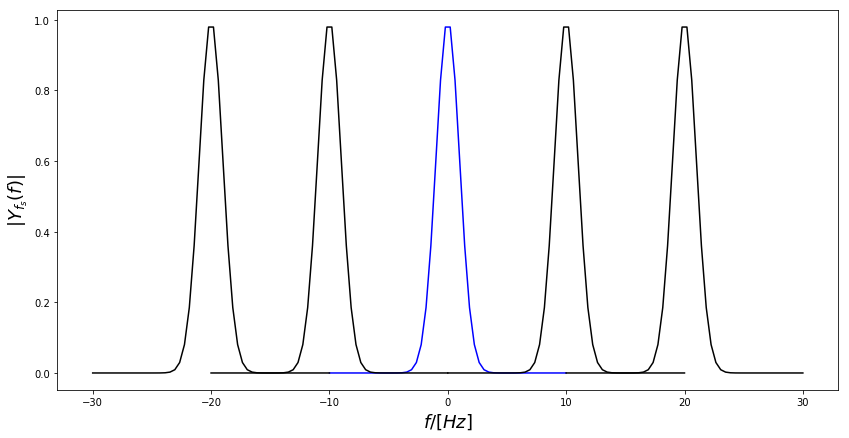

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2.0 / (2 * sig**2.0))

#Set sampling frequency 
fs = 10
#Set frequency domain of DFT
f = np.linspace(-fs,fs)
Y = gaussian(f,0,1.0)

plt.figure('rep_spec',figsize=(14,7))
plt.plot(f-0,Y,'b')
plt.plot(f-10.,Y, 'k')
plt.plot(f+10,Y, 'k')
plt.plot(f-20.,Y, 'k')
plt.plot(f+20,Y, 'k')
#plt.ylim(-0.5,fft_gau.max())
plt.ylabel('$|Y_{f_s}(f)|$',fontsize=18)
plt.xlabel('$f / [Hz]$',fontsize=18)
plt.show()

**Figure 2.9.4:** *The spectrum of a sufficiently oversampled signal.*

Here we have plotted $|Y(f)|$ (i.e. the $k=0$ component of $|Y_{f_s}(f)|$) in blue. This is the quantity we are actually after. With the stated values of $\sigma$ and $f_s$ we would have no problem recovering the input signal $y(t)$ from $Y(f)$ because there is almost no overlap between the aliases. If, on the other hand, the width is $\sigma = 2.5$, the situation changes because the aliases start overlapping as shown below. 

这里我们用蓝色绘制了$|Y(f)|$(即$| y_{f_s}(f)|$的$k=0$成分)。这就是我们要找的量。使用$\sigma$和$f_s$的指定值，我们可以很容易地从$y(f)$中恢复输入信号$y(t)$，因为别名之间几乎没有重叠。另一方面，如果宽度为$\sigma = 2.5$，情况就会发生变化，因为别名开始重叠，如下所示。

In [ ]:
f = np.linspace(-10,10)
Y = gaussian(f,0,2.5)

plt.figure('rep_spec',figsize=(14,7))
plt.plot(f-0,Y,'b')
plt.plot(f-10.,Y, 'k')
plt.plot(f+10,Y, 'k')
plt.plot(f-20.,Y, 'k')
plt.plot(f+20,Y, 'k')
#plt.ylim(-0.5,fft_gau.max())
plt.ylabel('$|Y_{f_s}(f)|$',fontsize=18)
plt.xlabel('$f / [Hz]$',fontsize=18)
plt.show()

**Figure 2.9.5:** *The spectrum of an undersampled signal.*

With the specified sampling rate there will always be some loss of information about the signal. Actually the situation is even worse than that since, when computing the DFT, input frequencies at $f_i = f_N + \epsilon$ (for $\epsilon > 0$) will also be aliased back into the spectrum at $f_k = f_N - \epsilon$. Attempting to reconstruct the input signal $y(t)$ from the resulting DFT components $Y_k$ would not return the correct result. An anti-aliasing filter is a form of low-pass filter which prevents the components of $Y_k$ corresponding to input frequencies $f_i > f_N$ from contaminating the reconstructed signal $y(t)$. Its basic operation is illustrated in the following figure. 

在指定的采样速率下，总是会丢失一些关于信号的信息。实际上，情况甚至更糟，因为在计算DFT时，$f_i = f_N + \epsilon$(对于$\epsilon > 0$)处的输入频率也会在$f_k = f_N - \epsilon$处混叠回频谱中。试图从生成的DFT组件$Y_k$重构输入信号$y(t)$不会返回正确的结果。抗混叠滤波器是一种低通滤波器，它可以防止与输入频率对应的$Y_k$的分量污染重构信号$y(t)$。其基本操作如下图所示。

In [ ]:
f = np.linspace(-5,5,20)
f2 = np.hstack((f[0],f, f[-1]))
Y = gaussian(f,0,2.5)
Y2 = np.hstack((0.0,Y,0.0))

plt.figure('rep_spec',figsize=(14,7))
plt.plot(f2-0,Y2,'b')
plt.plot(f2-10.,Y2, 'k')
plt.plot(f2+10,Y2, 'k')
plt.plot(f2-20.,Y2, 'k')
plt.plot(f2+20,Y2, 'k')

#plt.ylim(-0.5,fft_gau.max())
plt.ylabel('$|Y_{f_s}(f)|$',fontsize=18)
plt.xlabel('$f / [Hz]$',fontsize=18)
plt.show()

**Figure 2.9.6:** *This figure illustrates the function of an anti-aliasing filter.*

An ideal anti-aliasing filter filters out all frequencies above the Nyquist frequency $f_N$. This ensures that the signal $y(t)$ computed from the (possibly truncated) spectrum of $Y(f)$ will not contain any incorrect frequency components. Note that information about frequencies above $f_N$ will still have been lost. For simlicity the above discussion only considered the magnitude $|Y(f)|$ but similar ideas apply to the phase as well. Whereas an ideal anti-aliasing filter blocks out all frequencies above $f_N$ (i.e. has a gain of one when $f \leq f_N$ and zero otherwise), its frequency response should be linear so that it does not result in any phase distortion. 

理想的抗混叠滤波器可以滤除Nyquist频率$f_N$以上的所有频率。这确保从(可能截断的)$ y(f)$频谱计算出的信号$y(t)$不会包含任何不正确的频率成分。注意，关于$f_N$以上频率的信息仍然会丢失。对于simlicity，上面的讨论只考虑了$|Y(f)|$的大小，但是类似的思想也适用于阶段。理想的抗混叠滤波器会屏蔽掉$f_N$以上的所有频率(即当$f \leq f_N$时增益为1，否则为0)，而它的频率响应应该是线性的，这样就不会导致任何相位失真。

***

* Next: [2.10 Linear Algrebra](2_10_linear_algebra.ipynb)